In [1]:
import scipy
import h5py
import skimage
from skimage.color import rgb2gray
from skimage import color
import torch
from transformers import DPTFeatureExtractor, DPTForDepthEstimation
#import timm
import numpy as np
import io
from PIL import Image, ImageOps
from skimage import measure
from matplotlib import pyplot as plt
from skimage import filters

In [2]:
feature_extractor = DPTFeatureExtractor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

Downloading:   0%|          | 0.00/285 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/942 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
def process_image(image):
    # prepare image for the model
    encoding = feature_extractor(image, return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**encoding)
        predicted_depth = outputs.predicted_depth

    # interpolate to original size
    prediction = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1),
        size=image.size[::-1],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    output = prediction.cpu().numpy()
    formatted = (output * 255 / np.max(output)).astype('uint8')
    img = Image.fromarray(formatted)
    return img

    return result

C:\Users\Nikolai\anaconda3\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


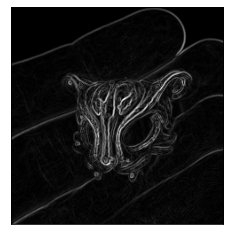

In [4]:
images = [Image.open(x) for x in ['catmask.jpg']]
iterator = 1
for i in images:
    widths, heights = i.size
    total_width = widths*2
    max_height = heights*2
    new_im = Image.new('RGBA', (total_width, max_height))
    grey = rgb2gray(i)
    edge_sobel = filters.sobel(grey)
    fig = plt.imshow(edge_sobel, cmap=plt.cm.gray)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png',bbox_inches='tight')
    im = Image.open(img_buf).resize(size=(widths, heights))
    Img = i.convert("RGBA")
    g = ImageOps.grayscale(i)
    grayRGB = ImageOps.colorize(g, black="black", white="white").convert("RGBA")
    depth_img = process_image(i)

    new_im.paste(Img, (0,0))
    new_im.paste(grayRGB, (widths,0))
    new_im.paste(im, (0,heights))
    new_im.paste(depth_img, (widths,heights))
    new_im.save('test.png')
    img_buf.close()

In [ ]:
# We will see if this works again

In [ ]:
# We will see if this works again